# Exercise 14

## Predict rating using LSTM


In [1]:
import pandas as pd

In [2]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [4]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [5]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

In [6]:
from sklearn.feature_extraction import text
import string
#lista de stopwords y puntuacion
stop = list(text.ENGLISH_STOP_WORDS)
puntuacion=list(string.punctuation)

stop.extend(puntuacion)

letras=list("abcdefghijklmnopqrstuvwxyzñ")
stop.extend(letras)

SYMBOLS = list('{}()[].,:;+-*/&|<>=~$£') 
stop.extend(SYMBOLS)
stop.append('')
stop.append('us$')
stop.append('r&b')
stop.append('\xa0')

In [7]:
plots=plots.to_list()
plots[0]


'most is the story of a single father who takes his eight year - old son to work with him at the railroad drawbridge where he is the bridge tender .  a day before ,  the boy meets a woman boarding a train ,  a drug abuser .  at the bridge ,  the father goes into the engine room ,  and tells his son to stay at the edge of the nearby lake .  a ship comes ,  and the bridge is lifted .  though it is supposed to arrive an hour later ,  the train happens to arrive .  the son sees this ,  and tries to warn his father ,  who is not able to see this .  just as the oncoming train approaches ,  his son falls into the drawbridge gear works while attempting to lower the bridge ,  leaving the father with a horrific choice .  the father then lowers the bridge ,  the gears crushing the boy .  the people in the train are completely oblivious to the fact a boy died trying to save them ,  other than the drug addict woman ,  who happened to look out her train window .  the movie ends ,  with the man wande

In [8]:
#Con esto vuelvo minusculas todo
plots=[x.lower() for x in plots]
plots[0]

'most is the story of a single father who takes his eight year - old son to work with him at the railroad drawbridge where he is the bridge tender .  a day before ,  the boy meets a woman boarding a train ,  a drug abuser .  at the bridge ,  the father goes into the engine room ,  and tells his son to stay at the edge of the nearby lake .  a ship comes ,  and the bridge is lifted .  though it is supposed to arrive an hour later ,  the train happens to arrive .  the son sees this ,  and tries to warn his father ,  who is not able to see this .  just as the oncoming train approaches ,  his son falls into the drawbridge gear works while attempting to lower the bridge ,  leaving the father with a horrific choice .  the father then lowers the bridge ,  the gears crushing the boy .  the people in the train are completely oblivious to the fact a boy died trying to save them ,  other than the drug addict woman ,  who happened to look out her train window .  the movie ends ,  with the man wande

In [9]:
#Con esto elimino los stop words de cada lista 
X=[]
for i in range(len(plots)):
  X.append(list(filter(lambda x: x not in stop, plots[i].split(' '))))

In [10]:
import itertools
merged = list(itertools.chain(*X))
merged[0]

'story'

In [11]:
merged

['story',
 'single',
 'father',
 'takes',
 'year',
 'old',
 'son',
 'work',
 'railroad',
 'drawbridge',
 'bridge',
 'tender',
 'day',
 'boy',
 'meets',
 'woman',
 'boarding',
 'train',
 'drug',
 'abuser',
 'bridge',
 'father',
 'goes',
 'engine',
 'room',
 'tells',
 'son',
 'stay',
 'edge',
 'nearby',
 'lake',
 'ship',
 'comes',
 'bridge',
 'lifted',
 'supposed',
 'arrive',
 'hour',
 'later',
 'train',
 'happens',
 'arrive',
 'son',
 'sees',
 'tries',
 'warn',
 'father',
 'able',
 'just',
 'oncoming',
 'train',
 'approaches',
 'son',
 'falls',
 'drawbridge',
 'gear',
 'works',
 'attempting',
 'lower',
 'bridge',
 'leaving',
 'father',
 'horrific',
 'choice',
 'father',
 'lowers',
 'bridge',
 'gears',
 'crushing',
 'boy',
 'people',
 'train',
 'completely',
 'oblivious',
 'fact',
 'boy',
 'died',
 'trying',
 'save',
 'drug',
 'addict',
 'woman',
 'happened',
 'look',
 'train',
 'window',
 'movie',
 'ends',
 'man',
 'wandering',
 'new',
 'city',
 'meets',
 'woman',
 'longer',
 'drug',
 '

In [12]:
#Creo el vocabulario de todas las palabras
vocabulary = {x: idx + 1 for idx, x in enumerate(set(merged))}
vocabulary

{'alicia': 1,
 'marginalizing': 2,
 'libelous': 3,
 'astray': 4,
 'clutched': 5,
 'hacks': 6,
 'dismantlement': 7,
 'cappadora': 8,
 'containers': 9,
 'copes': 10,
 'immortals': 11,
 'incredible': 12,
 'hudson': 13,
 'hallucinations': 14,
 'paris': 15,
 'optometrist': 16,
 'propel': 17,
 'bass': 18,
 'mistaken': 19,
 'salanger': 20,
 'facts': 21,
 'tasks': 22,
 'relative': 23,
 'kuwait': 24,
 'composing': 25,
 'gemstones': 26,
 'harmless': 27,
 'eroica': 28,
 'gloucestershire': 29,
 'pad': 30,
 'legit': 31,
 'anchor': 32,
 'spiritual': 33,
 'salty': 34,
 'fair': 35,
 'familiarity': 36,
 'insistence': 37,
 'garland': 38,
 'tournament': 39,
 'weekend': 40,
 'enlistment': 41,
 'unfocused': 42,
 'shreded': 43,
 'canceled': 44,
 'ponce': 45,
 'grouchland': 46,
 'advocates': 47,
 'hippolyte': 48,
 'yaqui': 49,
 'exorcism': 50,
 'illuminate': 51,
 'headed': 52,
 'enmity': 53,
 'shallow': 54,
 'barring': 55,
 'millbarge': 56,
 'community': 57,
 'salomon': 58,
 'finagle': 59,
 'appears': 60,
 '

In [13]:
lenght=pd.Series([len(x) for x in X])
lenght.describe(percentiles=[0.8,.9,.95,.97,.975])

count    7895.000000
mean       62.718049
std        40.496204
min         0.000000
50%        55.000000
80%        89.000000
90%       117.000000
95%       140.000000
97%       156.000000
97.5%     161.000000
max       765.000000
dtype: float64

In [14]:
# Max len
max_len_test = 161
X = [x[:max_len_test] for x in X]

In [15]:
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]
X[0]

[24656,
 26868,
 35027,
 26125,
 27963,
 32618,
 1414,
 5423,
 19220,
 38334,
 9645,
 6795,
 5217,
 11666,
 7319,
 22176,
 21023,
 29619,
 17853,
 26630,
 9645,
 35027,
 19279,
 23439,
 26015,
 1041,
 1414,
 6115,
 7470,
 10023,
 14372,
 35478,
 18726,
 9645,
 13639,
 10926,
 29991,
 27775,
 30972,
 29619,
 14660,
 29991,
 1414,
 20666,
 23880,
 9316,
 35027,
 2143,
 9199,
 30816,
 29619,
 16273,
 1414,
 15396,
 38334,
 24505,
 11631,
 26238,
 26087,
 9645,
 23935,
 35027,
 25622,
 14521,
 35027,
 16758,
 9645,
 31450,
 24983,
 11666,
 19091,
 29619,
 9884,
 3976,
 5997,
 11666,
 19408,
 36535,
 9746,
 17853,
 4896,
 22176,
 13095,
 21899,
 29619,
 27564,
 7340,
 18573,
 35692,
 12784,
 34457,
 29599,
 7319,
 22176,
 9459,
 17853,
 4896,
 8572,
 11727,
 8657,
 37830,
 2095,
 12468,
 21226,
 23135,
 17853,
 4896,
 14928,
 33408,
 26927,
 26680]

In [16]:
from keras.preprocessing import sequence
X_pad = sequence.pad_sequences(X, maxlen=max_len_test)

Using TensorFlow backend.


In [17]:
X_pad

array([[    0,     0,     0, ..., 33408, 26927, 26680],
       [    0,     0,     0, ..., 22877, 37783,  3233],
       [    0,     0,     0, ..., 27963, 32618, 29817],
       ...,
       [    0,     0,     0, ..., 37802, 26125, 31711],
       [    0,     0,     0, ..., 23245, 15216, 36493],
       [    0,     0,     0, ..., 29351, 18131, 33888]], dtype=int32)

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [22]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len_test))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()        

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 161, 128)          4913664   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,934,305
Trainable params: 4,934,305
Non-trainable params: 0
_________________________________________________________________


In [25]:
!pip install livelossplot

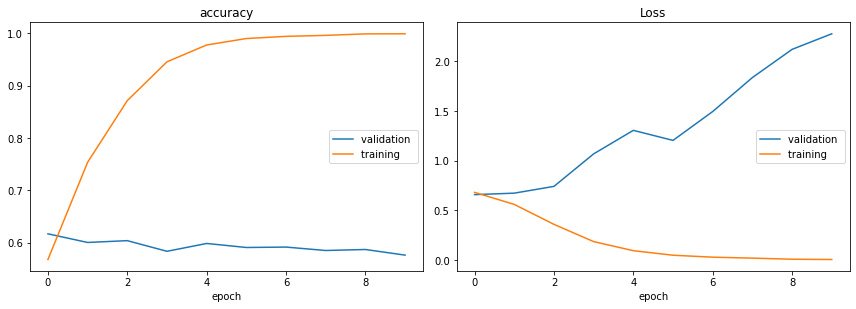

accuracy
	validation       	 (min:    0.576, max:    0.617, cur:    0.576)
	training         	 (min:    0.568, max:    0.999, cur:    0.999)
Loss
	validation       	 (min:    0.658, max:    2.274, cur:    2.274)
	training         	 (min:    0.006, max:    0.681, cur:    0.006)


In [26]:
from livelossplot import PlotLossesKeras
%matplotlib inline
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [27]:
y_pred = model.predict_classes(X_test)[:,0]

print((y_pred == y_test).mean())

0.5763622409823485
